In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score

In [2]:
#I have defined the dat class in Data_prep.py code to get data from file and prepare for analysis
from Data_prep import dat

In [3]:
#In this analysis we are using the following data https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
#we are trying to predict car prices based on different features
datobj=dat("../data/processed/Car_details_v3_cleaned.csv","selling_price",0.2,42)
df=datobj.df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          6267 non-null   int64  
 1   selling_price                 6267 non-null   int64  
 2   km_driven                     6267 non-null   int64  
 3   mileage                       6267 non-null   float64
 4   engine                        6267 non-null   float64
 5   max_power                     6267 non-null   float64
 6   fuel_Petrol                   6267 non-null   bool   
 7   seller_type_Individual        6267 non-null   bool   
 8   transmission_Manual           6267 non-null   bool   
 9   owner_Second Owner            6267 non-null   bool   
 10  owner_Third and above owners  6267 non-null   bool   
 11  seat_category_more than 5     6267 non-null   bool   
dtypes: bool(6), float64(3), int64(3)
memory usage: 379.4 KB


In [5]:
df=df.astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          6267 non-null   float64
 1   selling_price                 6267 non-null   float64
 2   km_driven                     6267 non-null   float64
 3   mileage                       6267 non-null   float64
 4   engine                        6267 non-null   float64
 5   max_power                     6267 non-null   float64
 6   fuel_Petrol                   6267 non-null   float64
 7   seller_type_Individual        6267 non-null   float64
 8   transmission_Manual           6267 non-null   float64
 9   owner_Second Owner            6267 non-null   float64
 10  owner_Third and above owners  6267 non-null   float64
 11  seat_category_more than 5     6267 non-null   float64
dtypes: float64(12)
memory usage: 636.5 KB


In [7]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_Third and above owners,seat_category_more than 5
count,6267.000000,6.267000e+03,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2013.599968,4.504369e+05,73702.630445,19.699196,1399.672730,84.586747,0.459550,0.908409,0.938886,0.284666,0.097974,0.191320
std,3.679598,2.541364e+05,47875.436535,3.831312,460.545875,25.625692,0.498401,0.288471,0.239558,0.451291,0.297303,0.393371
min,2001.000000,3.000000e+04,1000.000000,9.000000,624.000000,34.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.500000e+05,40000.000000,17.000000,1197.000000,68.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,4.000000e+05,70000.000000,19.700000,1248.000000,81.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2017.000000,6.050000e+05,100000.000000,22.540000,1498.000000,98.600000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2020.000000,1.295000e+06,475000.000000,28.400000,3498.000000,272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_corr=df.corr()
df_corr["selling_price"].nsmallest(1)

fuel_Petrol   -0.322558
Name: selling_price, dtype: float64

In [9]:
df_corr["selling_price"].nlargest(2)

selling_price    1.000000
year             0.629347
Name: selling_price, dtype: float64

<Axes: xlabel='max_power', ylabel='selling_price'>

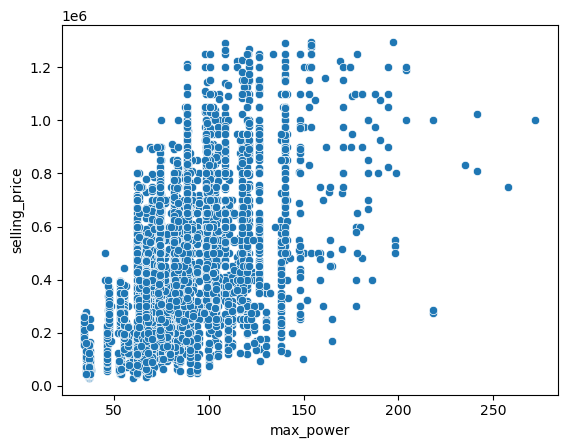

In [10]:
#The highest correlation of "selling_price" is with "max_power" feature
sns.scatterplot(data=df,y="selling_price",x="max_power")

C:\Users\17573\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


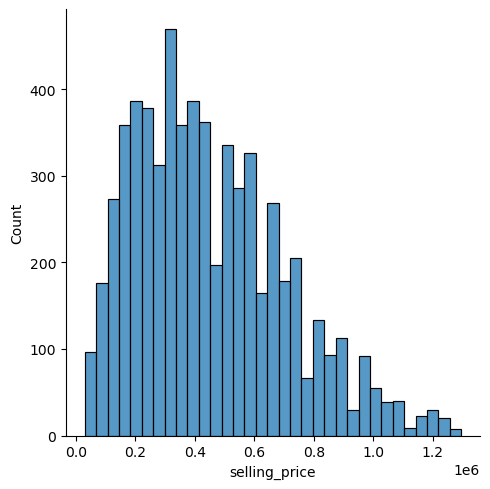

In [11]:
sns.displot(data=df,x="selling_price")

In [12]:
# Split data into training and test samples and Scale feature data using Standard Scaler
datobj.scale_dat()
X_train=datobj.X_train
X_test=datobj.X_test
y_train=datobj.y_train
y_test=datobj.y_test

In [13]:
X_test

array([[ 0.91878747, -1.12407775,  2.2832783 , ..., -0.62989515,
        -0.33211294, -0.48887778],
       [ 0.37509608,  0.13663369,  1.80966393, ..., -0.62989515,
        -0.33211294, -0.48887778],
       [ 0.37509608, -1.01901846, -0.20254301, ..., -0.62989515,
        -0.33211294, -0.48887778],
       ...,
       [-0.440441  ,  1.01448808, -1.99495101, ..., -0.62989515,
        -0.33211294,  2.04550103],
       [ 0.37509608,  2.09073643, -0.96137267, ..., -0.62989515,
        -0.33211294,  2.04550103],
       [-0.16859531, -0.01044931, -1.74898553, ..., -0.62989515,
        -0.33211294,  2.04550103]])

In [14]:
#In order not to have the label in a very different scale than features, we will scale labels by dividing by 10^5
units=100000
y_train=y_train/units
y_test=y_test/units

In [15]:
y_train

1199    6.10000
1646    4.00000
4054    2.29999
6473    2.95000
8041    0.90000
         ...   
4836    2.40000
6675    6.10000
6734    5.50000
6935    2.82000
1014    9.00000
Name: selling_price, Length: 5013, dtype: float64

# Base model

In [16]:
lr_model=LinearRegression()
#lr_model=ElasticNet()

In [17]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [18]:
lr_preds=lr_model.predict(X_test)

In [19]:
lr_preds

array([5.95547599, 4.89487644, 4.5277701 , ..., 6.20999659, 7.83685641,
       6.2521134 ])

In [20]:
mean_absolute_error(y_test,lr_preds)

1.0151288411251516

In [21]:
np.sqrt(mean_squared_error(y_test,lr_preds))

1.3510448845409988

In [22]:
#proportion of variance in the target variable that is explained by the model. 
#Values range from 0 to 1, with higher values indicating a better fit.
r2_score(y_test,lr_preds)

0.7265125706132686

In [23]:
# Calculate MAPE
mean_absolute_percentage_error(y_test,lr_preds)*100 #multiply by 100 to express in percentage

32.55784564184184

In [24]:
y_test_list=y_test.tolist()

In [25]:
residuals=[lr_preds[i]-y_test_list[i] for i in range(0,len(y_test_list))]

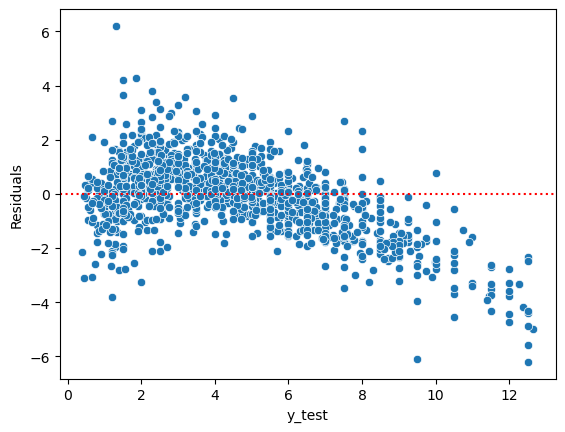

In [26]:
#Checking Homoscedasticity
sns.scatterplot(x=y_test_list,y=residuals)
plt.ylabel("Residuals")
plt.xlabel("y_test")
plt.axhline(y=0,color='r',linestyle=':')
plt.savefig("../report/Plots/Homoscedasticity.png",bbox_inches="tight")
# There is a difference between variations in one part of 
#the data and the other

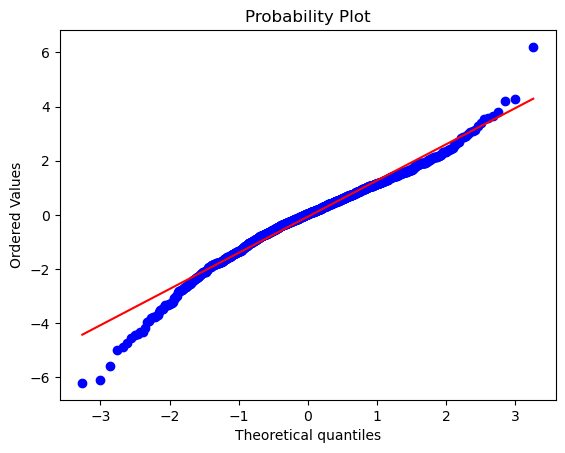

In [27]:
#Checking Normality
stats.probplot(residuals, dist="norm", plot=plt)
plt.savefig("../report/Plots/Normality.png",bbox_inches="tight")
plt.show()

#distribution is normal since points lie approximately at 45 degree reference line

# Try other regression models

In [28]:
def run_model(model,X_train,y_train,X_test,y_test):

    #Model fit
    model.fit(X_train,y_train)

    #Model predict
    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    mape=mean_absolute_percentage_error(y_test,preds)*100
    r2 = r2_score(y_test,preds)
    print("MAE:{}".format(mae))
    print("RMSE:{}".format(rmse))
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R² Score:", r2)

## Polynomial regression

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pol_deg=[2,3]
for ind in pol_deg:
    pipe=make_pipeline(PolynomialFeatures(degree=ind),LinearRegression())
    run_model(pipe,X_train,y_train,X_test,y_test)

MAE:0.8132910982551149
RMSE:1.1159394996394565
Mean Absolute Percentage Error (MAPE): 22.57557982780111
R² Score: 0.8134139742279146
MAE:20656266.924902774
RMSE:731476853.7111082
Mean Absolute Percentage Error (MAPE): 645508338.5427217
R² Score: -8.016762002694413e+16


## KNN regressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
k_values=[1,5,10]

In [33]:
for n in k_values:
    model=KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

MAE:0.9100825358851675
RMSE:1.3358560987762862
Mean Absolute Percentage Error (MAPE): 24.23186680945302
R² Score: 0.7326272337044955
MAE:0.7767348692185008
RMSE:1.1327912638726538
Mean Absolute Percentage Error (MAPE): 21.875541240108003
R² Score: 0.8077361669130906
MAE:0.8014007703349283
RMSE:1.1307809124445998
Mean Absolute Percentage Error (MAPE): 23.196033062399945
R² Score: 0.8084179781334786


In [34]:
#High variance with low k, higher k high bias

## Support Vector Regressor

In [35]:
from sklearn.svm import SVR

In [36]:
svr=SVR()
param_grid={"C":[1,10,100],"gamma":["auto","scale"]} #C is inversely proportional to reg. par.
grid=GridSearchCV(svr,param_grid)

In [37]:
run_model(grid,X_train,y_train,X_test,y_test)

MAE:0.760009529858957
RMSE:1.0869628440413281
Mean Absolute Percentage Error (MAPE): 20.223278511222574
R² Score: 0.8229780127847535


In [38]:
grid.best_params_

{'C': 10, 'gamma': 'scale'}

## Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rfr=RandomForestRegressor(n_estimators=10)

In [41]:
run_model(rfr,X_train,y_train,X_test,y_test)

MAE:0.6496459051682236
RMSE:0.9309023888744975
Mean Absolute Percentage Error (MAPE): 17.321700014758413
R² Score: 0.8701607184028508


## Gradient Boost Regressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
gboost=GradientBoostingRegressor()

In [44]:
param_grid={"n_estimators":[50,100],"learning_rate":[0.1,0.2,0.3],"max_depth":[3,5]}

In [45]:
grid=GridSearchCV(gboost,param_grid,scoring='neg_mean_squared_error', cv=5)

In [46]:
run_model(grid,X_train,y_train,X_test,y_test)

MAE:0.5981493912226938
RMSE:0.8658738324501631
Mean Absolute Percentage Error (MAPE): 15.703096186763169
R² Score: 0.8876670809782289


In [47]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

# XGBoost

In [48]:
import xgboost as xgb

In [49]:
xg_reg = xgb.XGBRegressor()

In [50]:
param_grid={"n_estimators":[50,100],"learning_rate":[0.1,0.2,0.3],"max_depth":[3,5]} # Number of trees (boosting rounds), Step size shrinkage, Maximum depth of a tree
grid=GridSearchCV(xg_reg,param_grid, scoring='neg_mean_squared_error', cv=5)

In [51]:
run_model(grid,X_train,y_train,X_test,y_test)

MAE:0.6001643551143618
RMSE:0.8682273649984504
Mean Absolute Percentage Error (MAPE): 16.123843397719835
R² Score: 0.8870555866105706


In [52]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

# PCA

In [53]:
from sklearn.decomposition import PCA

### ElasticNet

In [54]:
# Create the pipeline with make_pipeline
pipeline = make_pipeline(
PCA(n_components=5),         # Reduces dimensionality to 5 components
ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)  # ElasticNet with regularization
)

In [55]:
# Define parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [3,4,5, 7, 10],
    'elasticnet__alpha': [0.1, 0.5, 1.0],
    'elasticnet__l1_ratio': [0.2, 0.5, 0.8]
}


In [56]:
# Set up GridSearchCV with make_pipeline
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)


In [57]:
# Fit GridSearchCV
run_model(grid_search,X_train,y_train,X_test,y_test)

MAE:1.0230544299082702
RMSE:1.3692974082624845
Mean Absolute Percentage Error (MAPE): 31.667332784882575
R² Score: 0.7190730613423406


In [58]:
grid_search.best_params_

{'elasticnet__alpha': 0.1,
 'elasticnet__l1_ratio': 0.2,
 'pca__n_components': 10}

### XGBoost

In [59]:
from xgboost import XGBRegressor

In [60]:
pipeline = make_pipeline(
PCA(),       
XGBRegressor()
)

In [61]:
# Define parameter grid for GridSearchCV
param_grid = {
#    'pca__n_components': [3,4,5, 7, 10], #number of components to include
    'pca__n_components': [0.8,0.95,None],#Percent of variance to keep,None keeps 100% variance
    'xgbregressor__n_estimators': [50,100],
    'xgbregressor__learning_rate': [0.1,0.2, 0.5],
    'xgbregressor__max_depth': [3,5]
}

In [62]:
# Set up GridSearchCV with make_pipeline
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)

In [63]:
# Fit GridSearchCV
run_model(grid_search,X_train,y_train,X_test,y_test)

MAE:0.7492917794759194
RMSE:1.0480249325008317
Mean Absolute Percentage Error (MAPE): 20.724890433576864
R² Score: 0.8354336474451839


In [64]:
grid_search.best_params_

{'pca__n_components': None,
 'xgbregressor__learning_rate': 0.2,
 'xgbregressor__max_depth': 5,
 'xgbregressor__n_estimators': 100}

In [65]:
# Get the best pipeline
best_pipeline = grid_search.best_estimator_
# Access the PCA step
best_pca = best_pipeline.named_steps['pca']

In [66]:
 best_pca.n_components_

11

In [67]:
best_pca.explained_variance_ratio_

array([0.27823144, 0.16035989, 0.1208352 , 0.10872094, 0.08861156,
       0.07904248, 0.05311863, 0.04635176, 0.03396006, 0.0194682 ,
       0.01129984])

In [68]:
ls=best_pca.explained_variance_ratio_

In [69]:
ls.sum()

1.0

In [70]:
#With keeping 100% varince PCA still applies a transformation to the data, converting it into its principal component space, but the number of dimensions remains the same as the original dataset.
# We get worse performance with XGBRegreesor when combined with PCA, this is because 
# with PCA we are loosing non-linear patterns and interactions that are critical for XGBoost's performance


# Visualizations with SHAP

In [71]:
#SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory
#SHAP shows the contribution or the importance of each feature on the prediction of the model
import shap

In [72]:
y_test_pred=grid.predict(X_test)

In [73]:
feature_names=df.drop("selling_price",axis=1).columns

In [74]:
feature_names

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Petrol',
       'seller_type_Individual', 'transmission_Manual', 'owner_Second Owner',
       'owner_Third and above owners', 'seat_category_more than 5'],
      dtype='object')

In [75]:
X_test_df = pd.DataFrame(X_test, columns=feature_names)

In [76]:
# Fits the explainer
explainer = shap.Explainer(grid.predict,X_test_df)

In [77]:
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_df)

PermutationExplainer explainer: 1255it [04:45,  4.27it/s]                                                              


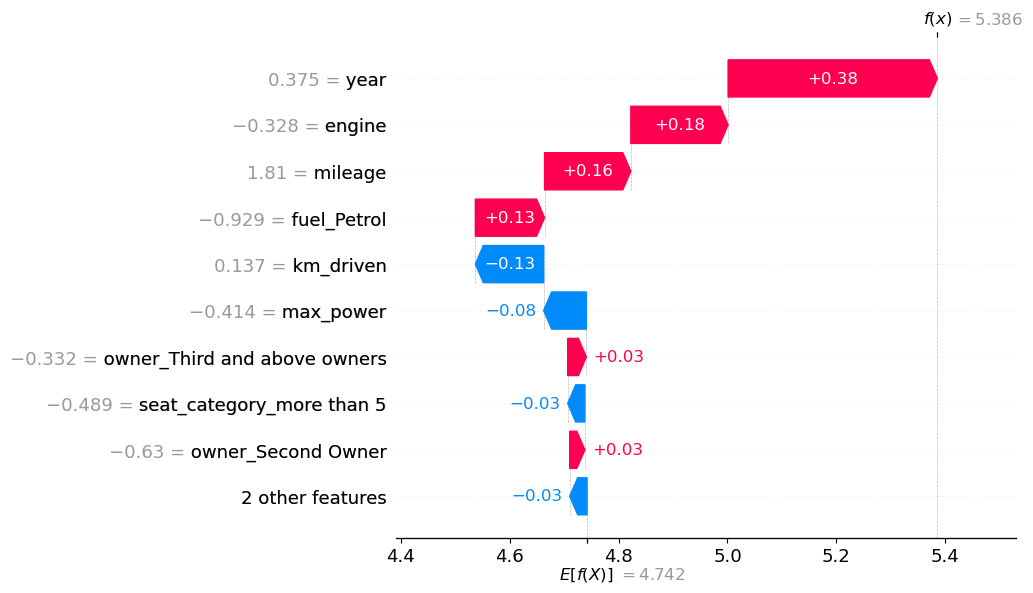

In [78]:
shap.plots.waterfall(shap_values[1])
#shap.plots.waterfall(shap_values[1],show=False)
#plt.savefig("../report/Plots/Waterfall_onerow.png",bbox_inches="tight")

In [79]:
#x-axis has the values of car sales price. x is the chosen observation,
#f(x) is the predicted value of the model, given input x and E[f(x)] is the the mean of all predictions
#The SHAP value for each feature in this observation is given by the length of the bar
#The sum of all SHAP values will be equal to E[f(x)] — f(x).

#### Bar plot

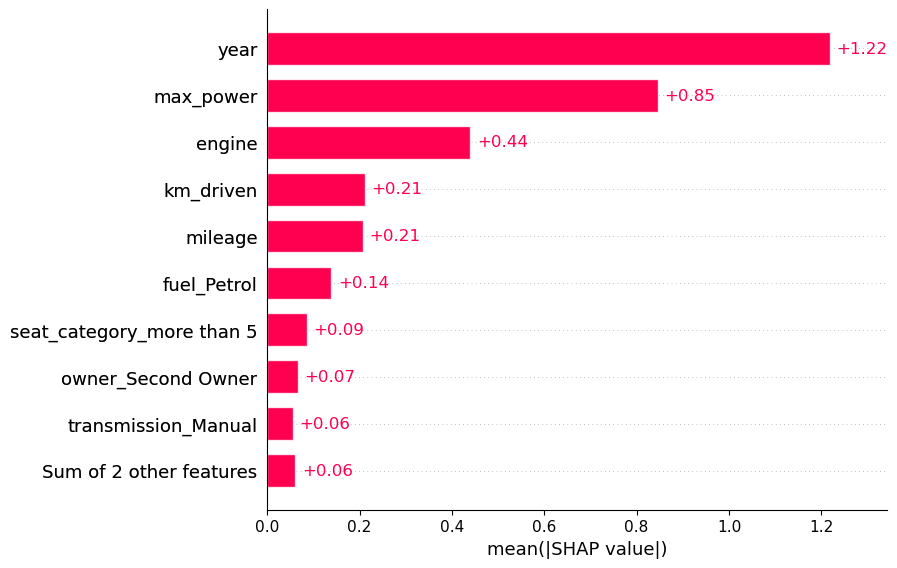

In [80]:
shap.plots.bar(shap_values)
#shap.plots.bar(shap_values,show=False)
#plt.savefig("../report/Plots/Feature_shapvalues.png",bbox_inches="tight")
#Here the features are ordered from the highest to the lowest effect on the prediction. It takes in account the absolute SHAP value.

In [81]:
# Here the features are ordered from the highest to the lowest effect on the prediction.
#It takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way.

#### Summary plot: violin

In [82]:
#shap.plots.beeswarm(shap_values)

In [83]:
#The features are ordered by their effect on prediction, 
#We can see how higher and lower values of the feature will affect the result.

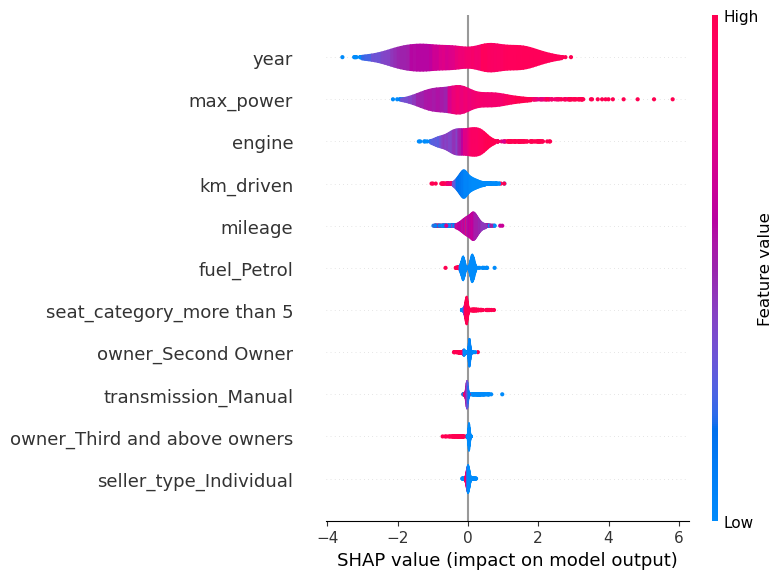

In [84]:
shap.summary_plot(shap_values, plot_type='violin',show=False)
#plt.savefig("../report/Plots/Feature_shapvalues_violin.png")